### Import libraries, Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional,SimpleRNN
from keras.optimizers import Adam, RMSprop

from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.optimizers import SGD


In [2]:
S_AND_P_500_INDEX = pd.read_csv('all_stocks_5yr.csv')


In [3]:
S_AND_P_500_INDEX.head(10)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [4]:
S_AND_P_500_INDEX.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
stocks = S_AND_P_500_INDEX.Name.unique()
stocks

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [6]:
stock = S_AND_P_500_INDEX.loc[S_AND_P_500_INDEX['Name'] == 'MSFT']
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 390198 to 391456
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [7]:
train_set = stock.iloc[:, 4:5].values
train_set.shape

(1259, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)
train_set_scaled.shape



(1259, 1)

### Train and Test Split

In [9]:
# X - closing prices of last 60 days
# y - closing price of present day

x_train = []
y_train = []
timestamp = 60
length = len(train_set)
for i in range(timestamp, length):
    x_train.append(train_set_scaled[i-timestamp:i, 0])
    y_train.append(train_set_scaled[i, 0])
    
X = np.array(x_train)
y = np.array(y_train)



# Train set split
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(959, 60) (959,)
(240, 60) (240,)


In [10]:

print (X_test[0])
print ('\n')
print (X_test.shape)
print ('\n')
print (y_test[0])
print ('\n')
print (y_test.shape)


[0.49852158 0.48625074 0.47057954 0.47131875 0.48565937 0.48166765
 0.50266115 0.49733885 0.51153164 0.51448847 0.52646363 0.52202839
 0.52054997 0.51641041 0.53592549 0.53474276 0.53474276 0.5348906
 0.53030751 0.53089888 0.52661147 0.5252809  0.51404494 0.52054997
 0.51641041 0.51641041 0.52439385 0.52143702 0.52114134 0.5295683
 0.52099349 0.52232407 0.51981076 0.51936724 0.51641041 0.52291543
 0.52616795 0.53444707 0.53681254 0.54553519 0.56785925 0.55824956
 0.55115316 0.53533412 0.52927262 0.53681254 0.53622117 0.5331165
 0.53178593 0.54243051 0.54154347 0.55218805 0.54997043 0.54937907
 0.54923122 0.55070964 0.5487877  0.54686576 0.55070964 0.55070964]


(240, 60)


0.5449438202247191


(240,)


In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(959, 60, 1)

### Train and Test Simple RNN

In [12]:


RNN_model = Sequential()
RNN_model.add(SimpleRNN(units = 92, input_shape = (X_train.shape[1], 1)))
RNN_model.add(Dense(1))
RNN_model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')


history = RNN_model.fit(X_train, y_train,epochs=10,batch_size=64)


RNN_model.summary()


Epoch 1/10
15/15 [==============================] - 0s 21ms/step - loss: 0.0505
Epoch 2/10
15/15 [==============================] - 0s 21ms/step - loss: 0.0016
Epoch 3/10
15/15 [==============================] - 0s 17ms/step - loss: 8.9276e-04
Epoch 4/10
15/15 [==============================] - 0s 17ms/step - loss: 7.3346e-04
Epoch 5/10
15/15 [==============================] - 0s 17ms/step - loss: 6.8470e-04
Epoch 6/10
15/15 [==============================] - 0s 20ms/step - loss: 6.7525e-04
Epoch 7/10
15/15 [==============================] - 0s 18ms/step - loss: 6.2627e-04
Epoch 8/10
15/15 [==============================] - 0s 20ms/step - loss: 5.9877e-04
Epoch 9/10
15/15 [==============================] - 0s 20ms/step - loss: 6.0390e-04
Epoch 10/10
15/15 [==============================] - 0s 20ms/step - loss: 5.5488e-04
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (Sim

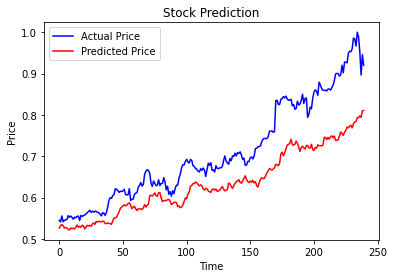

Mean Absolute Error:  0.07340729102380707
Mean Squared Error:  0.007603914560402581


In [13]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape


# predicting stock prices
y_pred = RNN_model.predict(X_test)
predicted_stock_price = (y_pred)
# predicted_stock_price = sc.inverse_transform(y_pred)





# plot
# plt.plot(sc.inverse_transform(y_test.reshape(-1,1)), color = 'blue', label = 'Actual Price')
plt.plot(y_test, color = 'blue', label = 'Actual Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_stock_price))

print('Mean Squared Error: ', mean_squared_error(y_test, predicted_stock_price))

### Train and Test LSTM

In [14]:
# Train and Test LSTM


LSTM_Model = Sequential()

LSTM_Model.add(LSTM(units = 92, return_sequences = True, input_shape = (X_train.shape[1], 1)))
LSTM_Model.add(Dropout(0.3))

LSTM_Model.add(LSTM(units = 72, return_sequences = True))
LSTM_Model.add(Dropout(0.3))

LSTM_Model.add(LSTM(units = 62, return_sequences = True))
LSTM_Model.add(Dropout(0.2))

LSTM_Model.add(LSTM(units = 32, return_sequences = False))
LSTM_Model.add(Dropout(0.2))

LSTM_Model.add(Dense(units = 1))
LSTM_Model.compile(optimizer = Adam(learning_rate=0.001), loss = 'mean_squared_error')

LSTM_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 92)            34592     
_________________________________________________________________
dropout (Dropout)            (None, 60, 92)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 72)            47520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 72)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 62)            33480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 62)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)               

In [15]:
LSTM_Model.fit(X_train, y_train, epochs = 10, batch_size = 64)


Epoch 1/10
15/15 [==============================] - 3s 193ms/step - loss: 0.0246
Epoch 2/10
15/15 [==============================] - 3s 172ms/step - loss: 0.0053
Epoch 3/10
15/15 [==============================] - 3s 176ms/step - loss: 0.0030
Epoch 4/10
15/15 [==============================] - 3s 182ms/step - loss: 0.0021
Epoch 5/10
15/15 [==============================] - 3s 187ms/step - loss: 0.0021
Epoch 6/10
15/15 [==============================] - 3s 179ms/step - loss: 0.0021
Epoch 7/10
15/15 [==============================] - 3s 169ms/step - loss: 0.0021
Epoch 8/10
15/15 [==============================] - 3s 187ms/step - loss: 0.0020
Epoch 9/10
15/15 [==============================] - 3s 186ms/step - loss: 0.0019
Epoch 10/10
15/15 [==============================] - 3s 179ms/step - loss: 0.0016


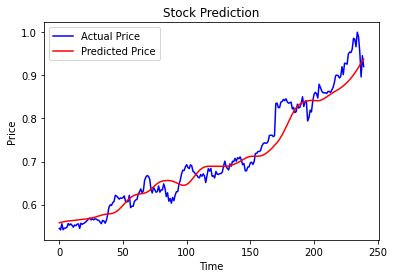

Mean Absolute Error:  0.02208071405304128
Mean Squared Error:  0.0008561655628294528


In [16]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

# predicting stock prices
y_pred = LSTM_Model.predict(X_test)
predicted_stock_price = (y_pred)
# predicted_stock_price = sc.inverse_transform(y_pred)


# plot
# plt.plot(sc.inverse_transform(y_test.reshape(-1,1)), color = 'blue', label = 'Actual Price')
plt.plot(y_test, color = 'blue', label = 'Actual Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_stock_price))

print('Mean Squared Error: ', mean_squared_error(y_test, predicted_stock_price))